Cancer detector -dataset 1992

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.0
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
library(psych)


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




In [3]:
if(!require('readr')) {
    install.packages('readr')
    library('readr')
}

In [4]:
df <- read_delim(paste("breast-cancer-1992-v4.csv","", sep=""),
	delim = ";",
	col_names = TRUE,
	escape_double = FALSE,
	col_types = cols(
		code=col_integer(),
		ClumpThickness = col_integer(),
		UniformityCellSize = col_integer(),
		UniformityCellShape = col_integer(),
		MarginalAdhesion = col_integer(),
		SingleEpithelialCellSize = col_integer(),
		BareNuclei = col_integer(),
		BlandChromatin = col_integer(),
		NormalNucleoli = col_integer(),
		Mitoses = col_integer(),
		Class = col_integer(),
	),
	trim_ws = TRUE)

In [5]:
df

code,ClumpThickness,UniformityCellSize,UniformityCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1000025,5,1,1,1,2,1,3,1,1,0
1002945,5,4,4,5,7,10,3,2,1,0
1015425,3,1,1,1,2,2,3,1,1,0
1016277,6,8,8,1,3,4,3,7,1,0
1017023,4,1,1,3,2,1,3,1,1,0
1017122,8,10,10,8,7,10,9,7,1,1
1018099,1,1,1,1,2,10,3,1,1,0
1018561,2,1,2,1,2,1,3,1,1,0
1033078,2,1,1,1,2,1,1,1,5,0


In [7]:
df$code <- NULL

In [8]:
map_int(df, function(.x) sum(is.na(.x)))

ClumpThickness       UniformityCellSize      UniformityCellShape 
                       0                        0                        0 
        MarginalAdhesion SingleEpithelialCellSize               BareNuclei 
                       0                        0                        0 
          BlandChromatin           NormalNucleoli                  Mitoses 
                       0                        0                        0 
                   Class 
                       0

In [9]:
table(df$Class)


  0   1 
458 241 

In [10]:
summary(df)

 ClumpThickness   UniformityCellSize UniformityCellShape MarginalAdhesion
 Min.   : 1.000   Min.   : 1.000     Min.   : 1.000      Min.   : 1.000  
 1st Qu.: 2.000   1st Qu.: 1.000     1st Qu.: 1.000      1st Qu.: 1.000  
 Median : 4.000   Median : 1.000     Median : 1.000      Median : 1.000  
 Mean   : 4.418   Mean   : 3.134     Mean   : 3.207      Mean   : 2.807  
 3rd Qu.: 6.000   3rd Qu.: 5.000     3rd Qu.: 5.000      3rd Qu.: 4.000  
 Max.   :10.000   Max.   :10.000     Max.   :10.000      Max.   :10.000  
 SingleEpithelialCellSize   BareNuclei     BlandChromatin   NormalNucleoli  
 Min.   : 1.000           Min.   : 1.000   Min.   : 1.000   Min.   : 1.000  
 1st Qu.: 2.000           1st Qu.: 1.000   1st Qu.: 2.000   1st Qu.: 1.000  
 Median : 2.000           Median : 1.000   Median : 3.000   Median : 1.000  
 Mean   : 3.216           Mean   : 3.555   Mean   : 3.438   Mean   : 2.867  
 3rd Qu.: 4.000           3rd Qu.: 5.000   3rd Qu.: 5.000   3rd Qu.: 4.000  
 Max.   :10.000     

In [11]:
df[1:9]

ClumpThickness,UniformityCellSize,UniformityCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
5,1,1,1,2,1,3,1,1
5,4,4,5,7,10,3,2,1
3,1,1,1,2,2,3,1,1
6,8,8,1,3,4,3,7,1
4,1,1,3,2,1,3,1,1
8,10,10,8,7,10,9,7,1
1,1,1,1,2,10,3,1,1
2,1,2,1,2,1,3,1,1
2,1,1,1,2,1,1,1,5


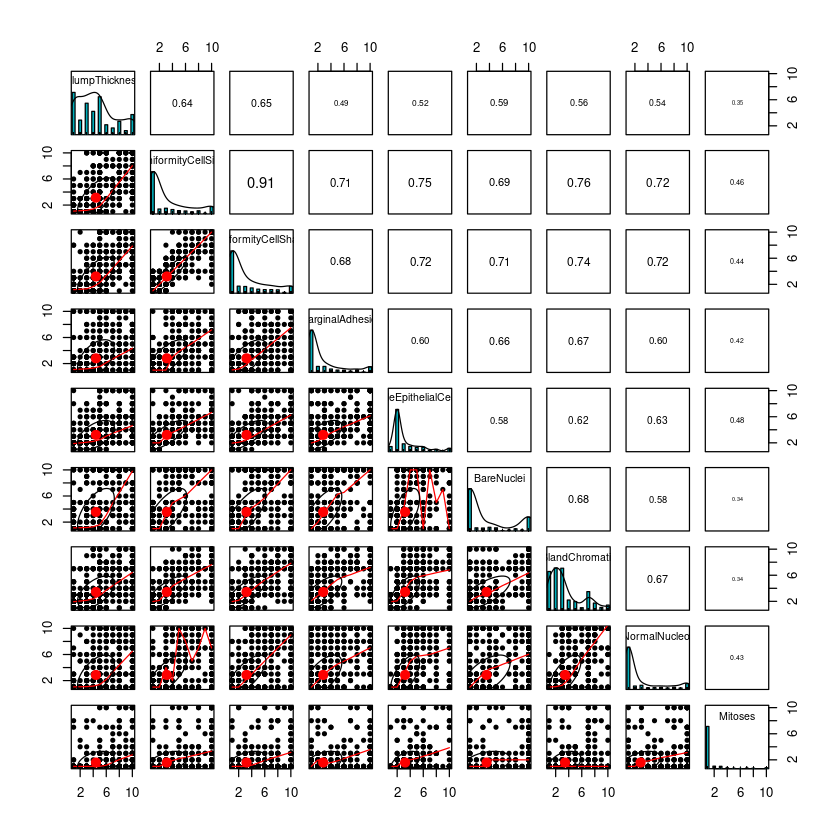

In [12]:
pairs.panels(df[1:9], method = "pearson",
hist.col = "#00AFBB",
density = TRUE,
ellipses = TRUE,
scale=20
)